In [1]:
import sys
sys.path.append("../code/")
from sklearn.metrics import mean_squared_error

from create_matrix import *


def get_tensor(df, start=1, stop=13):
#     start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    dfc = df.copy()

    df = dfc[energy_cols]

    tensor = df.values.reshape((len(df), 7, stop - start))
    return tensor

In [2]:
import pandas as pd
import numpy as np

In [3]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os


In [4]:
def create_region_df_dfc_static(region, year, start=1, stop=13):
    df, dfc = create_matrix_single_region(region, year)
    tensor = get_tensor(df, start, stop)
    static_region = df[['area', 'total_occupants', 'num_rooms']].copy()
    static_region['area'] = static_region['area'].div(4000)
    static_region['total_occupants'] = static_region['total_occupants'].div(8)
    static_region['num_rooms'] = static_region['num_rooms'].div(8)
    static_region = static_region.values
    return df, dfc, tensor, static_region

In [5]:
source, target = "Austin","SanDiego"
source_df, source_dfc, source_tensor, source_static = create_region_df_dfc_static(source, year)
target_df, target_dfc, target_tensor, target_static = create_region_df_dfc_static(target, year)

# # using cosine similarity to compute L
source_L = get_L(source_static)
target_L = get_L(target_static)

In [6]:
H_au, A_au, T_au, Hs, As, Ts, HATs, costs = learn_HAT_adagrad_graph(2, source_tensor, source_L, 3, 2, lr=1,
                                                                    lam=0, num_iter=600, dis=True )

489.086493096
54.4997338987


In [7]:
H_sd, A_sd, T_sd, Hs, As, Ts, HATs, costs = learn_HAT_adagrad_graph(2, target_tensor, target_L, 3, 2, lr=1,
                                                                    lam=0, num_iter=600, dis=True )

207.62262077
26.8370823579


In [8]:
H_au_sd, A_au_sd, T_au_sd, Hs, As, Ts, HATs, costs = learn_HAT_adagrad_graph(2, target_tensor, target_L, 3, 2, lr=1,
                                                                    lam=0, num_iter=600, dis=True, A_known = A_au )

186.278430782
28.0765979993


In [9]:
%matplotlib inline

In [10]:
dds = {}

dds[2014] = {'Austin':[x/787.0 for x in [10, 58, 72, 240, 408, 655, 715, 787, 588, 366, 43, 27]],
       'SanDiego':[x/787.0 for x in [65, 55, 136, 162,302, 262,428,433,472,374,176,69]],
       'Boulder':[x/787.0 for x in [0, 0,0,4,70, 213, 408, 314, 161, 31, 0, 0]]}

dds[2015] = {'Austin':[x/787.0 for x in [0, 16, 97, 292, 438, 579, 724, 747, 617, 376, 122, 46]]}

dd_keys = ['dd_'+str(x) for x in range(1,13)]


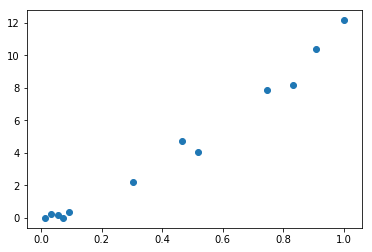

In [12]:
import matplotlib.pyplot as plt
plt.scatter(pd.Series(dds[2014]['Austin']), pd.Series(T_au[:,1]))

In [13]:
from plot_functions import latexify, format_axes

In [41]:
latexify(columns=1, fig_height=1.2)

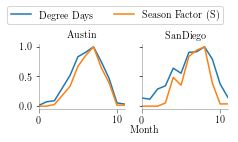

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
a_au  = pd.Series(dds[2014]['Austin'])
a_au = a_au.div(a_au.max())
b_au = pd.Series(T_au[:,1])
b_au = b_au.div(b_au.max())
a_au.plot(label='Degree Days', ax=ax[0])
b_au.plot(ax=ax[0], label='Season Factor (S)')

a_sd  = pd.Series(dds[2014]['SanDiego'])
a_sd = a_sd.div(a_sd.max())
b_sd = pd.Series(T_sd[:,1])
b_sd = b_sd.div(b_sd.max())
a_sd.plot(label='Degree Days', ax=ax[1])
b_sd.plot(ax=ax[1], label='Season Factor (S)')
l = plt.legend(bbox_to_anchor=(1, 1.65), ncol=2, fontsize=10)
format_axes(ax[0])
format_axes(ax[1])
ax[0].set_title("Austin")
ax[1].set_title("SanDiego")
f = fig.text(0.5, -0.15, "Month")
plt.savefig("../figures/season.pdf", bbox_inches="tight",bbox_extra_artists = [f, l])

In [38]:
e = pd.DataFrame(H_au)
f = pd.DataFrame(source_static)
f.columns = ['area','num-occupants','num-rooms']
pd.concat([e, f], axis=1).corr()

,0,1,2,area,num-occupants,num-rooms
0,1.000000,0.332557,0.465726,0.700071,0.333708,0.270242
1,0.332557,1.000000,0.061289,0.446882,0.300519,0.249380
2,0.465726,0.061289,1.000000,0.527473,0.122631,0.150263
area,0.700071,0.446882,0.527473,1.000000,0.342267,0.487478
num-occupants,0.333708,0.300519,0.122631,0.342267,1.000000,0.177126
num-rooms,0.270242,0.249380,0.150263,0.487478,0.177126,1.000000


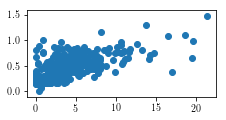

In [40]:
plt.scatter(H_au[:,0], f['area'])

In [33]:
pd.DataFrame(source_static)

,0,1,2
0,0.204000,NaN,NaN
1,0.511750,0.500,0.750
2,0.151500,NaN,NaN
3,0.900000,0.875,1.375
4,0.243750,NaN,NaN
5,0.667250,NaN,NaN
6,0.447000,NaN,NaN
7,0.733500,0.250,NaN
8,0.428250,0.250,0.375
9,0.325000,0.375,0.625


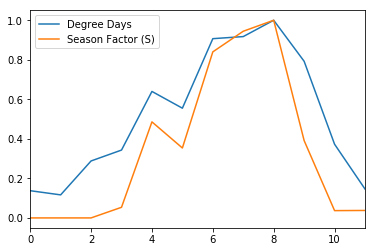

In [55]:
a  = pd.Series(dds[2014]['SanDiego'])
a = a.div(a.max())
b = pd.Series(T_sd[:,1])
b = b.div(b.max())
ax = a.plot(label='Degree Days')
b.plot(ax=ax, label='Season Factor (S)')
plt.legend()

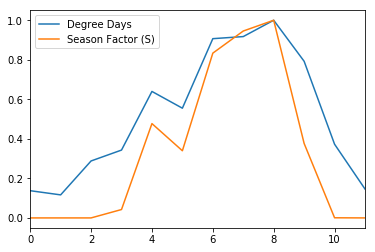

In [57]:
a  = pd.Series(dds[2014]['SanDiego'])
a = a.div(a.max())
b = pd.Series(T_au_sd[:,1])
b = b.div(b.max())
ax = a.plot(label='Degree Days')
b.plot(ax=ax, label='Season Factor (S)')
plt.legend()

In [5]:
H_sd = pickle.load(open('../predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0.pkl', 'r'))
H_error_home = pickle.load(open('../predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_error_home.pkl', 'r'))
H_error = pickle.load(open('../predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_error.pkl', 'r'))
H_params = pickle.load(open('../predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_params.pkl', 'r'))

In [6]:
H_params[325]

[2, 1300, 2, 3, 0.001]

In [7]:
best_show = [
            [2, 1300, 2,3,0.001],
            [2, 700, 2, 3, 0.001]
]

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

[0.1, 1300, 2, 3, 0]
9.64394298538
~/git/task3/demo_2_1300_2_3_0.001.png
[0.1, 1300, 2, 3, 0.001]
10.6814626598
~/git/task3/demo_2_700_2_3_0.001.png


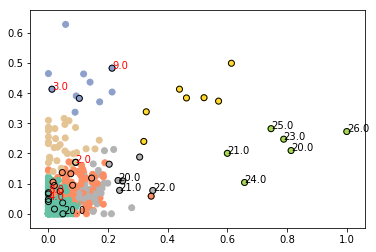

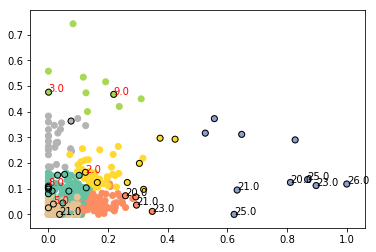

In [14]:
for i in range(len(best_show)):
# for i in range(1):
    lr, iters, season, home, lam = best_show[i]
    print H_params[i]
    
    H_sandiego = H_sd[lr][iters][season][home][lam]
    H_austin = H_au[lr][season][home][lam][iters]
    
    H_sandiego = pd.DataFrame(pd.concat(H_sandiego))
    H_sandiego = H_sandiego.values
    
    X = np.r_[H_austin, H_sandiego]
    print np.max(X)
    X = X/np.max(X)
    y_pred = KMeans(n_clusters=7, random_state=0).fit_predict(X)
    x1, x2 = (-np.var(X, axis=0)).argsort()[:2]
    
    y_sd = np.zeros(len(H_sandiego))
    y_au = np.ones(len(H_austin))
    y_label = np.r_[y_au, y_sd]
    
    home_error = H_error_home[lr][iters][season][home][lam]
    home_error = np.around(home_error.values)    
    
    
    start = len(H_austin)
    d = np.random.randint(0, 2, size=(3,3,3))
    z,x,y = d.nonzero()
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    ax = fig.add_subplot(111)
#     ax.scatter(X[:, x1], X[:, x2], c = y_label, cmap='autumn')
    ax.scatter(X[:, x1], X[:, x2], c = y_pred, cmap='Set2')
    ax.scatter(X[start:, x1], X[start:, x2], color='black', marker='o', facecolors='none')
#     ax.set_color('yellow', 'red')
    # ax.scatter(X[:, 2], X[:, 0], X[:,1], zdir='z', c= y_label)
    
    max_idx = (-home_error).argsort()[:10]
    min_idx = (home_error).argsort()[:5]
    
    for i in max_idx:
        ax.annotate(home_error[i], (X[i+start, x1],X[i+start, x2]))
    for i in min_idx:
        ax.annotate(home_error[i], (X[i+start, x1],X[i+start, x2]), color='red')
        
    print "~/git/task3/demo_{}_{}_{}_{}_{}.png".format(lr, iters, season, home, lam)

    #plt.savefig("../results/Home_factors_{}_{}_{}_{}_{}.png".format(lr, iters, season, home, lam))


In [210]:
(-np.var(X, axis=0)).argsort()[:2]

array([3, 4])

In [205]:
X

array([[ 0.01635801,  0.0517815 ,  0.03943585,  0.01259887,  0.03302816],
       [ 0.07921914,  0.07894605,  0.07840301,  0.07925766,  0.07939159],
       [ 0.02948893,  0.03248081,  0.02282549,  0.0217706 ,  0.03641466],
       ..., 
       [ 0.05789175,  0.12478885,  0.07216465,  0.01096588,  0.15634926],
       [ 0.05540949,  0.05265663,  0.08815022,  0.10616215,  0.02584823],
       [ 0.01143033,  0.01786658,  0.09138949,  0.0909926 ,  0.0115726 ]])

In [28]:
np.argmin(H_sd['Error'])

1

In [107]:
y_pred = KMeans(n_clusters=5, random_state=0).fit_predict(X)

In [31]:
lr, iters, home, season, lam = H_sd['Learning Params'][1]

In [114]:
H_sd['Learning Params'][1]

[0.1, 1300, 2, 3, 0.001]

In [57]:
H_sandiego = H_sd['H'][lr][iters][home][season][lam]
H_austin = H_au[lr][home][season][lam][iters]
H_sandiego = pd.DataFrame(pd.concat(H_sandiego))
H_sandiego = H_sandiego.values

In [105]:
X = np.r_[H_austin, H_sandiego]

In [106]:
X

array([[ 1.44978439,  1.85235149,  2.24196778],
       [ 5.07829371,  5.19002611,  5.31706703],
       [ 1.25873953,  1.91841413,  2.01917777],
       ..., 
       [ 3.91653929,  4.54876306,  4.20064527],
       [ 3.54303754,  2.33810825,  4.02175073],
       [ 1.79951822,  0.7918247 ,  3.57216809]])

In [108]:
y_sd = np.zeros(39)
y_au = np.ones(len(H_austin))

In [110]:
y_label = np.r_[y_au, y_sd]

In [146]:
result = pickle.load(open(os.path.expanduser('./result.pkl'), 'r'))
result = np.around(result.values)

In [147]:
result

array([ 17.,  20.,  28.,  18.,  26.,  17.,  15.,  16.,  22.,  19.,  25.,
        12.,  17.,  20.,  18.,   8.,  12.,  18.,   5.,  11.,   2.,  12.,
        22.,  17.,  15.,   4.,  22.,  24.,  15.,  24.,  14.,  11.,  17.,
        17.,  27.,  22.,  28.,  11.,  14.])

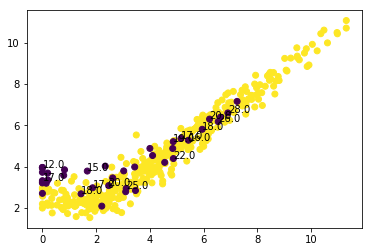

In [156]:

start = len(H_austin)
d = np.random.randint(0, 2, size=(3,3,3))
z,x,y = d.nonzero()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)
ax.scatter(X[:, 1], X[:, 2], c= y_label)
# ax.scatter(X[:, 2], X[:, 0], X[:,1], zdir='z', c= y_label)

for i in range(start, start + 15):
    ax.annotate(result[i-start], (X[i, 1],X[i, 2]))

plt.savefig("demo.png")